<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/Quadratic%20Drag%20for%20Vertical%20Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- - - -
# Quadratic Drag for Vertical Motion

- - - -

Martin Veillette @ Berea College

- - - -

## Solving a first order differential equation numerically

Consider a baseball thrown verticaly with a speed of 30 m/s (about 70 mi/h).
Find the position of the ball as a function of time and compare its trajectory to the frictionless case

Using a coordinate system where upward is defined as positive y, we have to solve the differential equation
$$m \frac{d v_y}{dt} = - m g - c  |v_y| v_y$$


The terminal speed is $v_{ter} = \sqrt{\frac{mg}{c}}$. The characteristic time scale for this problem is $\tau\equiv \frac{v_{ter}}{g}$.


Rewriting the equation in term of $\tilde{t}=t/\tau$ and $\tilde{v}=v_y/v_{ter}$, we arrive to


$$\frac{d \tilde{v}}{d \tilde{t}} = - 1 -  |\tilde{v}| \tilde{v}$$


In [4]:
# import numpy library and matplotlib

import numpy as np

# to plot our result
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (14,10)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14
#get_ipython().magic('matplotlib inline') # inline plotting

## Numerical Solution using Euler-Cromer Method

The code below uses the Euler-Cromer method to numerically solve the differential equation. This method is a simple integration technique that is more stable than the basic Euler method for many physical systems. It updates the velocity first based on the acceleration at the current time step and then uses this updated velocity to calculate the new position.

The equations used are:

$v_{i+1} = v_i + a_i \Delta t$

$y_{i+1} = y_i + v_{i+1} \Delta t$

where:
- $v_i$ and $y_i$ are the velocity and position at the current time step $i$.
- $a_i$ is the acceleration at the current time step $i$.
- $\Delta t$ is the time step size.
- $v_{i+1}$ and $y_{i+1}$ are the velocity and position at the next time step $i+1$.




In [12]:
# parameters

tmax = 5.00 # final time in units of tau
numberOfSteps = 1000  # number of steps to divide time interval
dt= tmax/numberOfSteps

timeRange = np.linspace(0, tmax, numberOfSteps)

# initial conditions

v = -10.0  # initial velocity in units of terminal speed
y = 0  # initial vertical position

# storing variable in arrays
vs = []  # array of v's
ys = []  # array of y's

# loop over time
for t in timeRange:
     a =-1 - abs(v) * v  # acceleration

     y = y + v * dt + 1/2 * a * dt**2  # vertical position

     v = v + a * dt # vertical velocity

     # storing results in an array
     vs.append(v)

     ys.append(y)



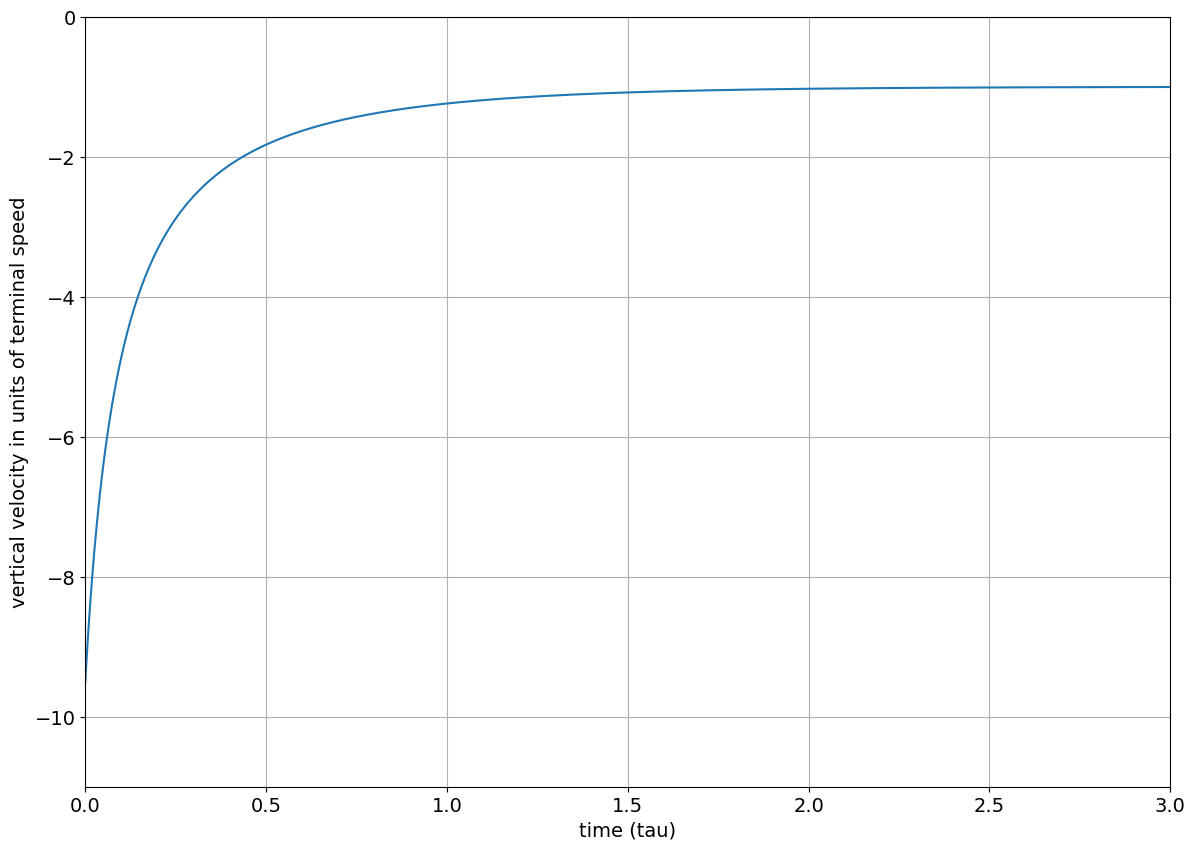

In [13]:
# plot the solution
plt.plot(timeRange,vs)
plt.ylabel('vertical velocity in units of terminal speed')
plt.xlabel('time (tau)')
plt.grid()
plt.axis([0,3,-11,0])
plt.savefig('velocity.png')
plt.show()

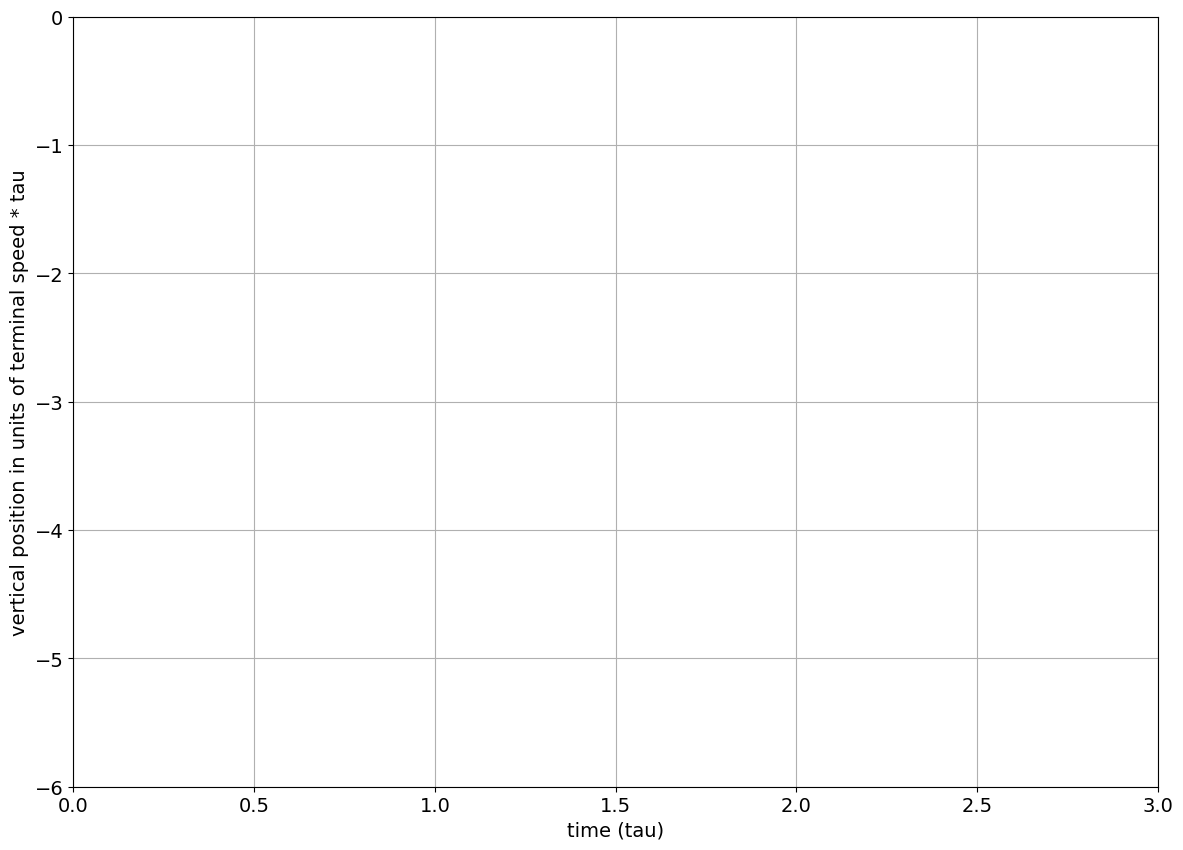

In [11]:
# plot the solution
plt.plot(timeRange,ys)
plt.ylabel('vertical position in units of terminal speed * tau')
plt.xlabel('time (tau)')
plt.grid()
plt.axis([0,3,-6,0])
plt.savefig('position.png')
plt.show()

## How long does it take for the ball to reach the maximum height

In [ ]:
# maximum height
maxHeight=np.max(ys)
maxHeight

In [ ]:
yIndex=ys.index(maxHeight)
yIndex

In [ ]:
np.argmax(ys)

In [ ]:
# time at maximum height
timeRange[yIndex]

In [ ]:
# create numpy arrays
y=np.array(ys)

In [ ]:
yIndex=np.min(np.where(y<0))

In [ ]:
timeOfFlight = timeRange[yIndex]
timeOfFlight

In [ ]:
ys=np.array(0)

In [ ]:
ys=np.append(ys,3)